In [7]:
#from IPython.display import Markdown, Javascript
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import seaborn as sns
import warnings
import random
pd.set_option('display.float_format', lambda x: '%.3f' % x)
sns.set_context(rc = {'patch.linewidth': 1.0})
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE, SMOTENC, RandomOverSampler

random_state = 42
random.seed(random_state)

In [8]:
df = pd.read_csv("train.csv", delimiter=";")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


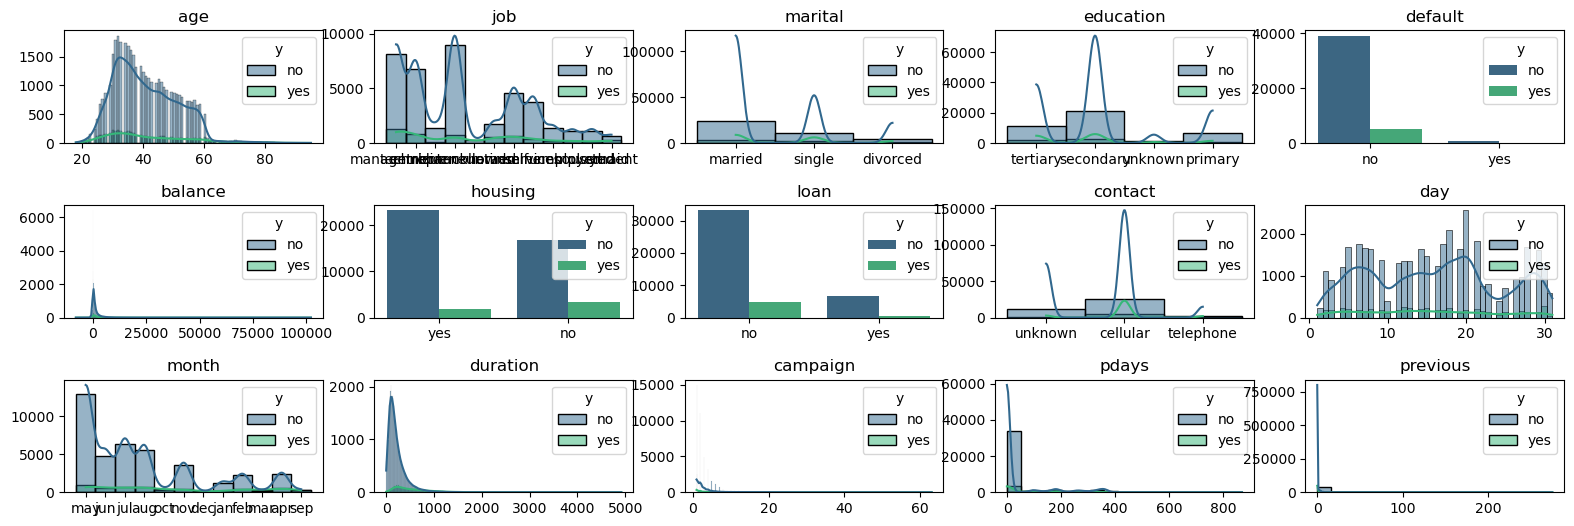

In [12]:
#display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'''))

def data_viz(df):
    fig = plt.figure(figsize=(8,6))
    gs = gridspec.GridSpec(3, 5, right=2, hspace=0.55)
    axs = []
    for y in range(3):
        for x in range(5):
            ax = fig.add_subplot(gs[y, x])
            axs.append(ax)
            col = df.columns[((y*5) + x) % len(df.columns)]
            if len(df[ col ].value_counts()) == 2:
                g = sns.countplot(data=df, x=col, hue='y', palette='viridis', ax=ax)
            else:
                g = sns.histplot(data=df, x=col, hue='y', palette='viridis', kde=True, ax=ax)
            g.set(ylabel=None, xlabel=None)
            g.set_title(col)
            if col in ["Total_income", "Income_type"]: g.set_xticklabels(g.get_xticklabels(), rotation=30)
    plt.show()

data_viz(df)